ปฏิบัติการครั้งที่ 3 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้นบันทึกเป็นไฟล์ *.pdf

### ในปฏิบัติการนี้เราจะฝึกการทำ PCA ด้วยสองวิธี คือ
1. หาด้วยการแยกส่วนประกอบของเมทริกซ์ผ่าน numpy
2. หาด้วยการใช้เครื่องมือที่มีมาให้ใน scikit-learn

ดาวน์โหลดข้อมูลสัตว์ต่างๆ 50 ชนิดดังนี้  
ชนิดสัตว์: https://donlapark.pages.dev/229351/data/classes.txt  
ตัวแปรต่างๆ: https://donlapark.pages.dev/229351/data/predicates.txt  
ค่าของสัตว์แต่ละชนิด: https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

In [1]:
!pip install -q wget

import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA



  Preparing metadata (setup.py) ... done


In [3]:
# Download the files
!wget -O classes.txt https://donlapark.pages.dev/229351/data/classes.txt
!wget -O predicate-matrix-continuous.txt https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

--2025-07-23 12:43:16--  https://donlapark.pages.dev/229351/data/classes.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 755 [text/plain]
Saving to: ‘classes.txt’

classes.txt         100%[===================>]     755  --.-KB/s    in 0s      

2025-07-23 12:43:16 (7.35 MB/s) - ‘classes.txt’ saved [755/755]

--2025-07-23 12:43:16--  https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29800 (29K) [text/plain]
Saving to: ‘predicate-matrix-continuous.txt’

predicate-matrix-co 100%[===================>]  29

In [4]:
classes = np.genfromtxt('classes.txt',dtype='str')

classes[:5]

array([['1', 'antelope'],
       ['2', 'grizzly+bear'],
       ['3', 'killer+whale'],
       ['4', 'beaver'],
       ['5', 'dalmatian']], dtype='<U15')

In [5]:
data = np.genfromtxt('predicate-matrix-continuous.txt')

data[:5,:5]

array([[-1.  , -1.  , -1.  , -1.  , 12.34],
       [39.25,  1.39,  0.  , 74.14,  3.75],
       [83.4 , 64.79,  0.  ,  0.  ,  1.25],
       [19.38,  0.  ,  0.  , 87.81,  7.5 ],
       [69.58, 73.33,  0.  ,  6.39,  0.  ]])

#### Exercise 1

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ฟังก์ชัน $\texttt{np.linalg.eigh}$  
ดังนั้น เมทริกซ์ที่ได้ต้องมีขนาด 50x2

$$ \Sigma =
  \begin{pmatrix}
\text{var}(X_1) & \text{cov}(X_1,X_2) & \cdots & \text{cov}(X_1,X_{85}) \\
\text{cov}(X_2,X_1) & \text{var}(X_2) & \cdots & \text{cov}(X_2,X_{85}) \\
\vdots & \vdots & \ddots & \vdots \\
\text{cov}(X_{85},X_1) & \text{cov}(X_{85},X_1) & \cdots & \text{var}(X_{85}) \\
\end{pmatrix}
 $$

In [15]:
data_c = data - np.mean(data, axis=0)
cov_matrix = np.cov(data_c, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
U_pca = eigenvectors[:, -2:]
projected_data = data_c @ U_pca
print(projected_data)
print(projected_data.shape)


[[ 106.35992505   14.33200256]
 [ -76.22681969  -58.9630861 ]
 [-139.3662367   170.08767172]
 [ -54.04638157   31.85582565]
 [ -11.3917049   -29.65753503]
 [ -10.72272289  -40.87859041]
 [ 104.79228138    1.17791115]
 [ -45.38757524  -82.43016284]
 [ -82.83737143  211.92608739]
 [ -43.3052917   -90.92835147]
 [  35.20297112  -58.01597662]
 [  20.17533047  -33.18440666]
 [ -92.38136512 -127.19955243]
 [  24.05695316  129.48931695]
 [ -89.2965802  -117.35250987]
 [ 129.17123958   28.55636713]
 [   6.27693742  -43.49964663]
 [ -95.28906181  226.54893728]
 [  85.05034027   95.64111855]
 [   1.34492612  -18.3316707 ]
 [ 120.70785352   56.58550468]
 [ -74.12827031 -111.97091878]
 [ 132.31759287   25.79398483]
 [-100.93057781  151.36316459]
 [  19.55128584  -67.92677834]
 [  49.77147826  -48.25033667]
 [  11.07402232  -61.48822496]
 [  65.00899433   96.32422934]
 [  68.2626778   -32.71055049]
 [ -58.45553839  -55.32175189]
 [ 124.27963392   24.47458869]
 [ -86.88931727  -99.3303442 ]
 [ -12.8

#### OPTIONAL

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ $scikit-learn$  
พร้อมกับตรวจสอบว่าเมทริกซ์ที่ได้จากทั้งสองวิธีนี้มีค่าเท่ากัน (ต่างกันแค่ค่าบวกลบ)

In [18]:
pca = PCA(n_components=2)
projected = pca.fit_transform(data_c)
print(projected)



[[  14.33200256  106.35992505]
 [ -58.9630861   -76.22681969]
 [ 170.08767172 -139.3662367 ]
 [  31.85582565  -54.04638157]
 [ -29.65753503  -11.3917049 ]
 [ -40.87859041  -10.72272289]
 [   1.17791115  104.79228138]
 [ -82.43016284  -45.38757524]
 [ 211.92608739  -82.83737143]
 [ -90.92835147  -43.3052917 ]
 [ -58.01597662   35.20297112]
 [ -33.18440666   20.17533047]
 [-127.19955243  -92.38136512]
 [ 129.48931695   24.05695316]
 [-117.35250987  -89.2965802 ]
 [  28.55636713  129.17123958]
 [ -43.49964663    6.27693742]
 [ 226.54893728  -95.28906181]
 [  95.64111855   85.05034027]
 [ -18.3316707     1.34492612]
 [  56.58550468  120.70785352]
 [-111.97091878  -74.12827031]
 [  25.79398483  132.31759287]
 [ 151.36316459 -100.93057781]
 [ -67.92677834   19.55128584]
 [ -48.25033667   49.77147826]
 [ -61.48822496   11.07402232]
 [  96.32422934   65.00899433]
 [ -32.71055049   68.2626778 ]
 [ -55.32175189  -58.45553839]
 [  24.47458869  124.27963392]
 [ -99.3303442   -86.88931727]
 [ -73.5

In [ ]:
#TODO (optional): enter code here

#### Exercise 2

ทำการพล็อตจุดของข้อมูลที่ได้จาก PCA ข้างบนพร้อมกับใส่คำกำกับว่าจุดไหนเป็นของสัตว์ชนิดใดโดยใช้ชื่อสัตว์จาก classes.txt

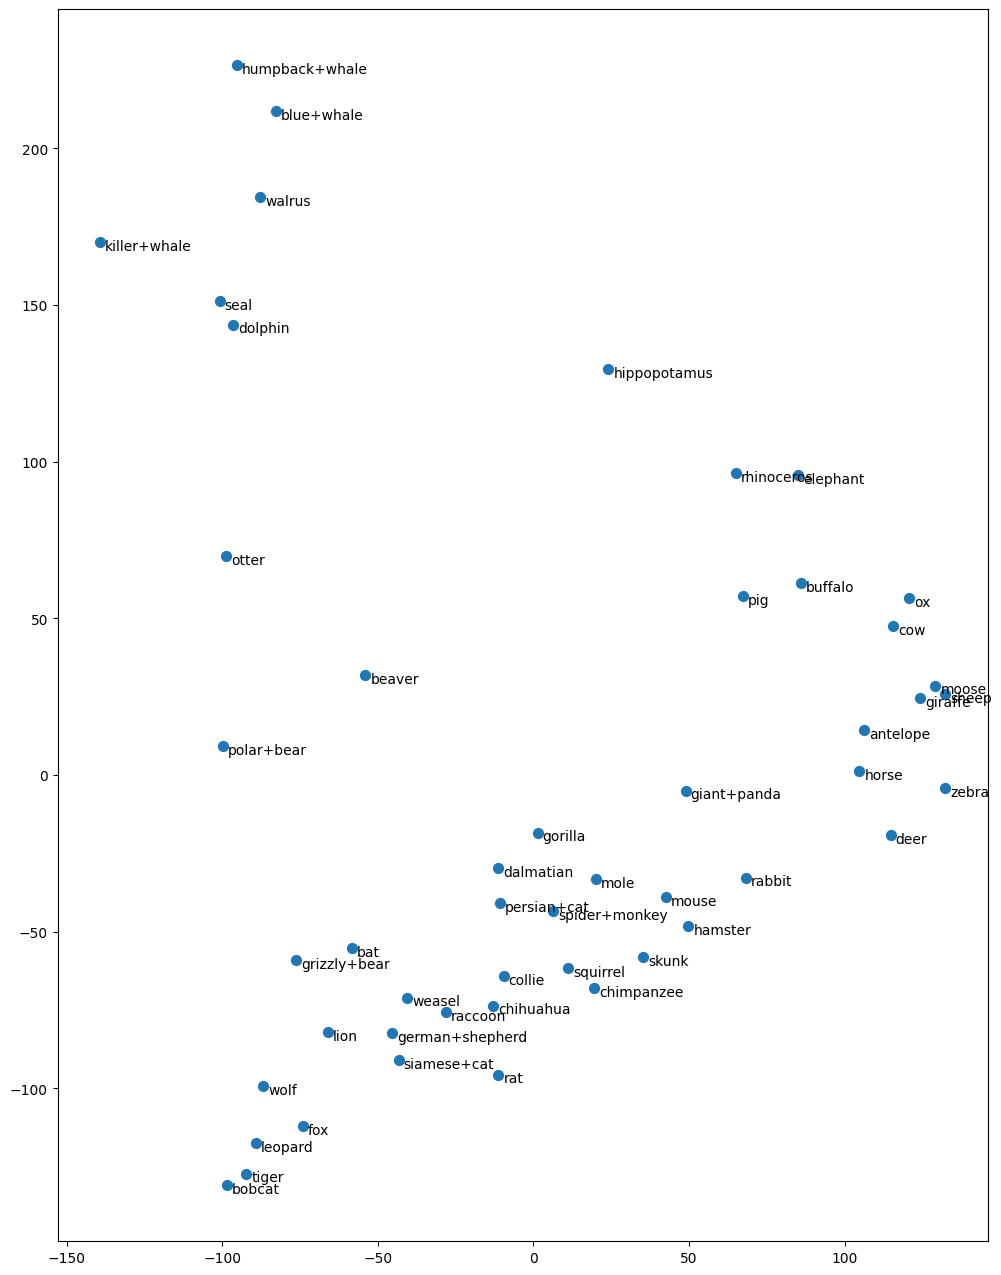

In [26]:
# กำหนดขนาดของรูป
plt.figure(figsize=(12,16))

# จงเติม argument ที่เหมาะสมในวงเล็บข้างล่างนี้
# รูปแบบของฟังก์ชันคือ plt.scatter(numpy array ของ x-coordinate, numpy array ของ y-coordinate)
plt.scatter(projected_data[:,0], projected_data[:,1], s = 50)

# for loop เพื่อใส่คำกำกับ (annotate) ชื่อสัตว์ของแต่ละจุด วนให้ครบสัตว์ทุกชนิดที่อยู่ใน classes
# ใส่ numpy array ที่ผ่านการทำ PCA แล้วลงในตำแหน่งที่ระบุเพื่อบอกพิกัดที่ต้องวางคำกำกับ
for i in range(50):
  plt.annotate(classes[i,1], xy=(projected_data[i,0], projected_data[i,1]), xytext=(5, -8), textcoords='offset pixels')

plt.show()

#### Exercise 3

หากลุ่มสัตว์ต่างๆ ที่อยู่ใกล้กันมา 4 กลุ่ม แล้วลองอธิบายว่าสัตว์ในแต่ละกลุ่มมีอะไรที่เหมือนกัน

1.กลุ่มสัตว์ทะเลเลี้ยงลูกโดยนมขนาดใหญ่ เช่น blue whale, killer whale, walrus, seal, dolphin มีลักษณะที่เหมือนกัน คือ เลี้ยงลูกด้วยนมท่มีขนาดใหญ่ถึงใหญ่มาก ส่วนใหญ่เป็นสัตว์ทะเล อาศัยอยู่ในน้ำ
2.กลุ่มสัตว์กีบเท้าหรือสัตว์กินพืชขนาดกลางถึงใหญ่ เช่น rhinoceros, elephant, hippopotamus, buffalo มีลักษณะที่เหมือนกัน คือ เป็นสัตว์บกขนาดกลางถึงขนาดใหญ่ กินพืชเป็นหลัก มีกีบเท้าและบางชนิดมีนอ
3.กลุ่มสัตว์เลี้ยงหรือสัตว์บ้าน เช่น cat, dog, rat, mouse มีลักษณะที่เหมือนกัน คือ ส่วนใหญ่มีขาดเล็ก เป็นสัตว์เลี้ยงหรืออาศัยอยู่กีับมนุยษ์ หฃมีหลายชนิดอาศัยอยู่ที่ป่า
4.กลุ่มสัตว์ป่าดุร้ายหรือกินเนื้อขนาดใหญ่ เช่น lion, tiger, wolf, leopard, fox, bobcat มีลักษณะที่เหมือนกัน คือ สัตว์ในกลุ่มนี้ส่วนใหญ่เป็นสัตว์นักล่าขนาดกลางถึงใหญ่ อาศัยอยู่ในป่า มีความสามารถในการล่าเหยื่อสูงและมีพฤติกรรมดุร้าย มีร่างกายที่แข็งแรงและกรงเล็บแหลมคม